
# Data Science Toolbox Laboratory
## CA4 - Daily Calories Burn Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "calories.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,Gender,Age,Height,Weight,Duration
0,female,20,166.0,60.0,14.0
1,female,34,179.0,71.0,13.0
2,female,27,154.0,58.0,10.0
3,female,36,151.0,50.0,23.0
4,female,33,158.0,56.0,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    135 non-null    object 
 1   Age       135 non-null    int64  
 2   Height    135 non-null    float64
 3   Weight    135 non-null    float64
 4   Duration  135 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.4+ KB


In [5]:
# Display basic statistics for each column
df.describe()

,Age,Height,Weight,Duration
count,135.000000,135.000000,135.000000,135.000000
mean,31.125926,172.666667,72.592593,16.540741
std,7.464773,14.362576,14.622767,8.439215
min,20.000000,136.000000,45.000000,1.000000
25%,25.000000,162.000000,61.000000,9.000000
50%,31.000000,172.000000,71.000000,17.000000
75%,37.500000,182.000000,84.000000,24.000000
max,45.000000,203.000000,109.000000,30.000000



Harris-Benedict Equation Based Formula

1. For Men: BMR = 88.362 + (13.397 x weight in kg) + (4.799 x height in cm) - (5.677 x age in years).
2. For Women: BMR = 447.593 + (9.247 x weight in kg) + (3.098 x height in cm) - (4.330 x age in years).

The Mifflin St Jeor equation based formula is considered more accurate than Harris-Benedict, especially for lean individuals.
1. For Men: BMR = (10 x weight in kg) + (6.25 x height in cm) - (5 x age in years) + 5. 
2. For Women:BMR = (10 x weight in kg) + (6.25 x height in cm) - (5 x age in years) - 161.

In [6]:
def cbmr(x):
    bmr=None
    if (x['Gender']=='male'):
        bmr = (10 * x['Weight']) + (6.25 * x['Height']) - (5 * x['Age']) + 5
    else:
        bmr = (10 * x['Weight']) + (6.25 * x['Height']) - (2 * x['Age']) - 161
    return bmr    


In [7]:

df['bmr'] =df.apply(lambda x : cbmr(x), axis=1)

In [8]:
df.head()

,Gender,Age,Height,Weight,Duration,bmr
0,female,20,166.0,60.0,14.0,1436.50
1,female,34,179.0,71.0,13.0,1599.75
2,female,27,154.0,58.0,10.0,1327.50
3,female,36,151.0,50.0,23.0,1210.75
4,female,33,158.0,56.0,22.0,1320.50


In [9]:
df['duration_per_day'] = (df['Duration']//7).astype(int)

In [38]:
df['Gender'].value_counts()

Gender
0    73
1    62
Name: count, dtype: int64

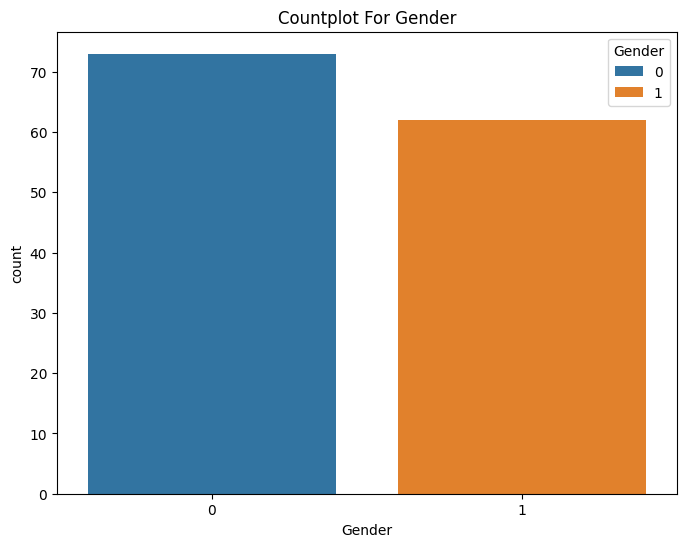

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Gender', hue='Gender')
plt.title("Countplot For Gender")
plt.show()

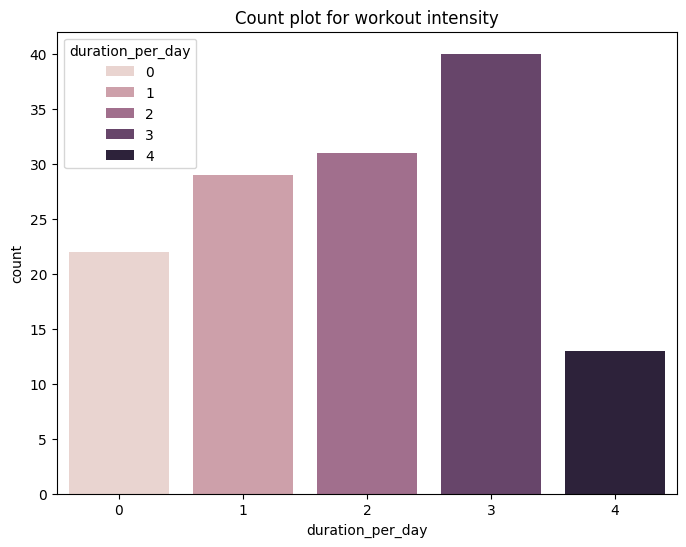

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="duration_per_day", hue="duration_per_day")
plt.title("Count plot for workout intensity")
plt.show()

## Multiplicatives for calculating daily calories burned.

1. 1.2 points for a person who does little to no exercise
2. 1.37 points for a slightly active person who does light exercise 1–3 days a week
3. 1.55 points for a moderately active person who performs moderate exercise 3–5 days a week
4. 1.725 points for a very active person who exercises hard 6–7 days a week
5. 1.9 points for an extra active person who either has a physically demanding job or has a particularly challenging exercise routine

In [11]:
def cal_calc(x):
    cal=None
    if (x['duration_per_day']==0):
        cal= x['bmr']*1.2
    elif (x['duration_per_day']==1):
        cal= x['bmr']*1.37
    elif (x['duration_per_day']==2):
        cal= x['bmr']*1.55
    elif (x['duration_per_day']==3):
        cal= x['bmr']*1.725
    elif (x['duration_per_day']==4):
        cal= x['bmr']*1.9
    return cal    

In [12]:
df['calories_burned'] = df.apply(lambda x : cal_calc(x), axis=1).round(0)

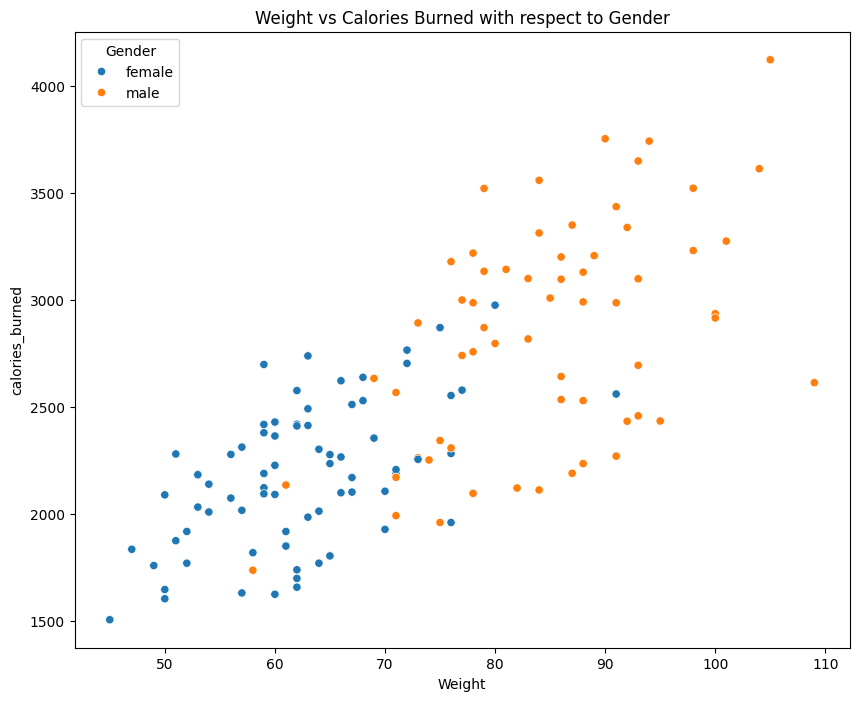

In [13]:
# calories burned vs weight
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Weight", y="calories_burned", hue='Gender')
plt.title("Weight vs Calories Burned with respect to Gender")
plt.show()

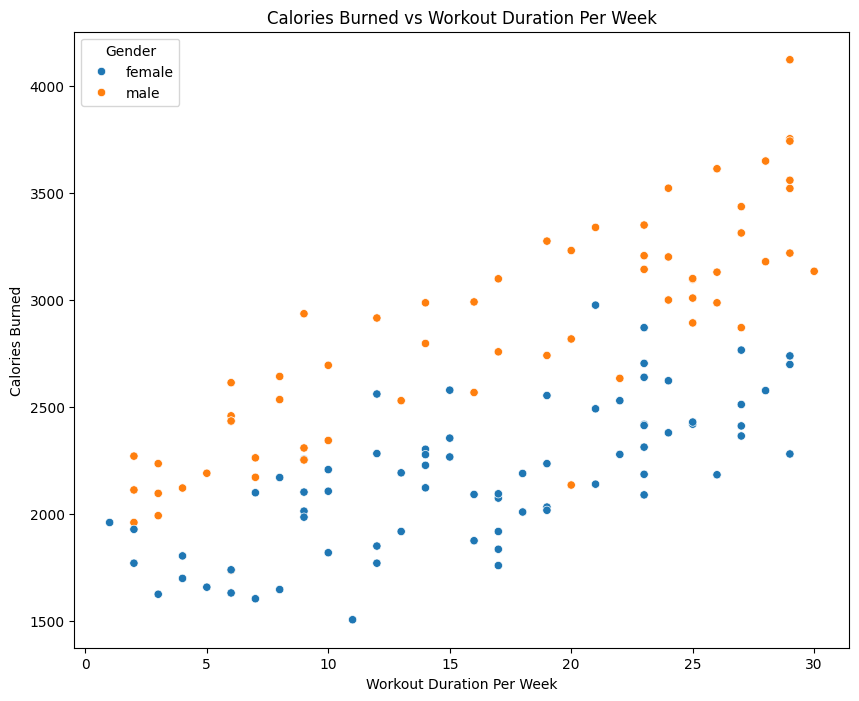

In [14]:
# plot calories burnt vs duration
plt.figure(figsize=(10, 8))
sns.scatterplot(df,x='Duration', y='calories_burned',hue='Gender')
plt.xlabel('Workout Duration Per Week')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs Workout Duration Per Week')
plt.show()

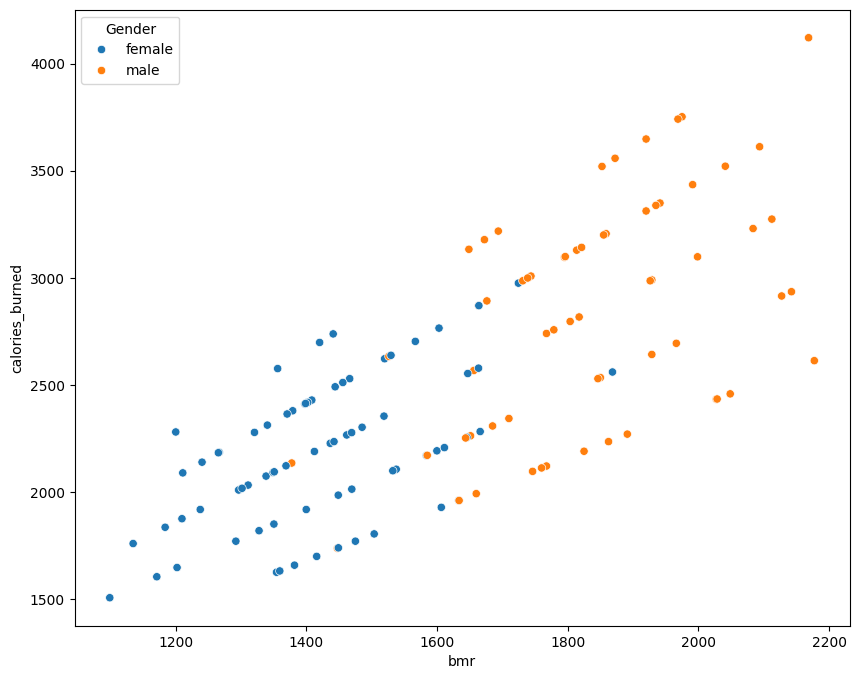

In [15]:
# calories burnt vs bmr
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="bmr", y="calories_burned", hue='Gender')
plt.show()

In [16]:
gender_stats=df.groupby('Gender')['bmr'].mean()

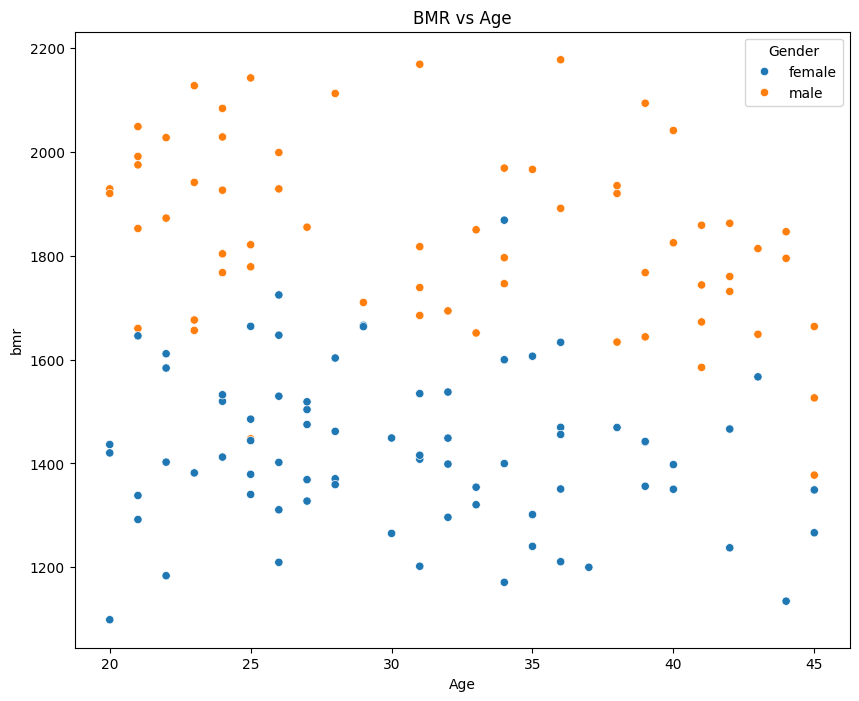

In [17]:
# plot bmr vs age
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Age", y="bmr", hue='Gender')
plt.title('BMR vs Age')
plt.show()

In [18]:
# convert gender to 0 and 1
map={'female':0,'male':1}
df['Gender']=df['Gender'].replace(map)

/var/folders/5p/kmmv906d4fs21yq53trpbg_c0000gn/T/ipykernel_80669/773231583.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace(map)


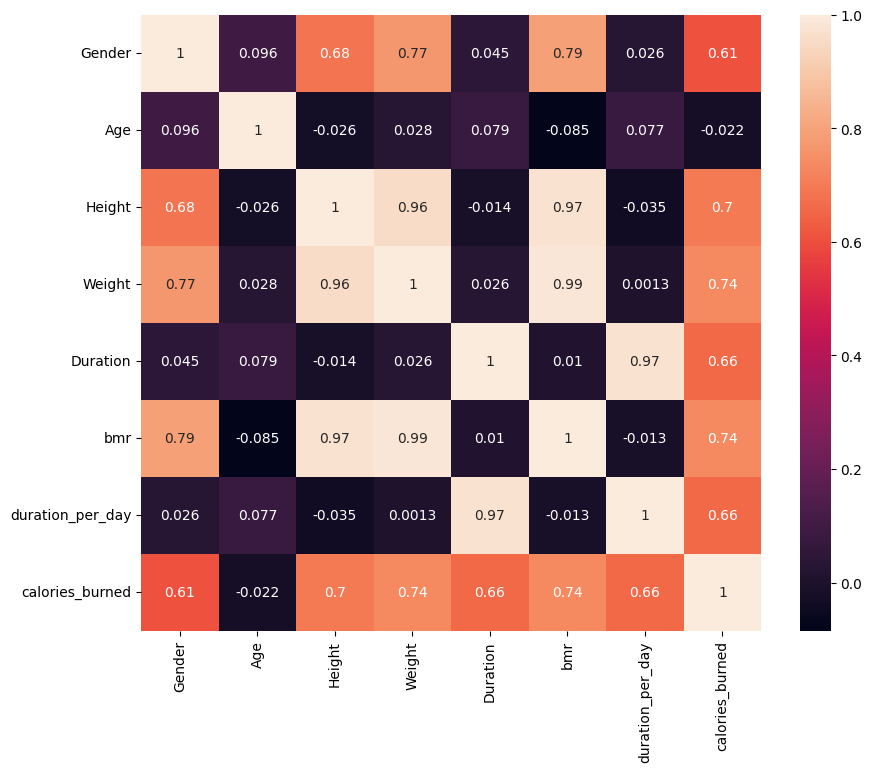

In [19]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

<center>

# Splitting Data

</center>

In [20]:
from sklearn.model_selection import train_test_split

# X=df[['Weight','bmr']]
X = df.drop(columns = ["calories_burned"],axis = 1)
y=df['calories_burned']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<center>

# MODEL BUILDING

</center>

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)
Y_pred = linreg.predict(X_test)
acc_lin = round(linreg.score(X_train,y_train)* 100, 2)
print("Linear Regression Accuracy:", acc_lin, "%")

Linear Regression Accuracy: 99.07 %


# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print("Logistic Regression Accuracy:", acc_log, "%")

Logistic Regression Accuracy: 87.04 %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVC

In [23]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("SVM Accuracy:", acc_svc, "%")

SVM Accuracy: 4.63 %


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("KNN Accuracy:", acc_knn, "%")

KNN Accuracy: 35.19 %


# Gaussian

In [25]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("Naive Bayes Accuracy:", acc_gaussian, "%")

Naive Bayes Accuracy: 100.0 %


# Perceptron

In [26]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print("Perceptron Accuracy:", acc_perceptron, "%")

Perceptron Accuracy: 0.93 %


# Linear SVC

In [27]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print("Linear SVC Accuracy:", acc_linear_svc, "%")

Linear SVC Accuracy: 89.81 %


# SGD Classifier

In [28]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print("SGD Accuracy:", acc_sgd, "%")

SGD Accuracy: 0.93 %


# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("Decision Tree Accuracy:", acc_decision_tree, "%")

Decision Tree Accuracy: 100.0 %


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Random Forest Accuracy:", acc_random_forest, "%")

Random Forest Accuracy: 100.0 %


# Determining The Best Model

In [31]:
models = pd.DataFrame({
'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron',
'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree', 'Linear Regression'],
'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree, acc_lin]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
4,Naive Bayes,100.00
8,Decision Tree,100.00
9,Linear Regression,99.07
7,Linear SVC,89.81
2,Logistic Regression,87.04
1,KNN,35.19
0,Support Vector Machines,4.63
5,Perceptron,0.93
6,Stochastic Gradient Decent,0.93


Checking The Errors

In [32]:
from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\nx')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

Score : 1.0
predictions are: 
 [2235. 2192. 2122. 1960. 2207. 2009. 1770. 2935. 1737. 2411. 3218. 2529.
 2642. 2418. 3098. 1770. 2013. 2312. 2122. 2892. 2553. 3129. 2308. 2112.
 2280. 1850. 3129.]

x
r2 score: 0.7889172250911278
MAE: 135.62962962962962
MSE: 32741.85185185185
RMSE: 180.9470968317863


/var/folders/5p/kmmv906d4fs21yq53trpbg_c0000gn/T/ipykernel_80669/3854986062.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_prediction)


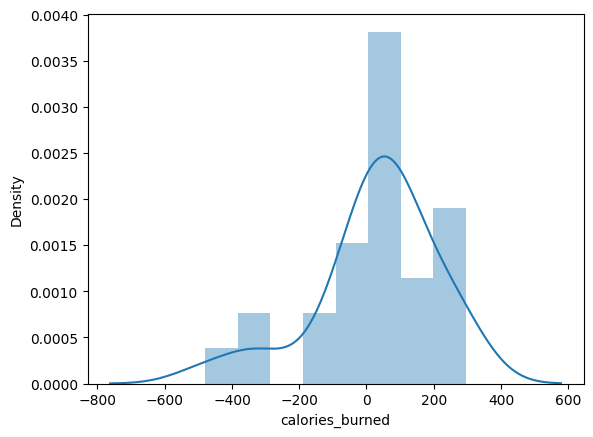

In [33]:
predict(RandomForestClassifier())

Score : 0.990729044315255
predictions are: 
 [2272.18646366 2279.33313348 2366.1996393  1957.87395124 2162.41427014
 2022.83292674 1738.29924389 2791.22196832 1509.69566721 2537.86054834
 2808.26154412 2668.0802291  2585.55778747 2544.75474494 3303.55123835
 1992.6485905  2310.92898206 2339.7818799  2278.01410606 2574.18667545
 2584.24855714 3077.45984536 2358.43555645 2301.85063386 2693.56454784
 1860.57971663 3182.08592996]

x
r2 score: 0.9781244294392017
MAE: 39.71420756214572
MSE: 3393.202930867299
RMSE: 58.251205402697884


/var/folders/5p/kmmv906d4fs21yq53trpbg_c0000gn/T/ipykernel_80669/3854986062.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_prediction)


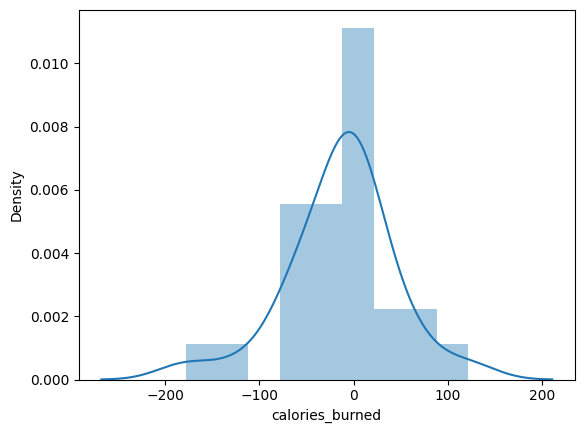

In [34]:
predict(LinearRegression())